Tratamento do Dataset

In [ ]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

#### data INFO

In [ ]:
# data.dtypes
data.info() #milage
# data.head()
# data.tail()
# data.shape #(3207, 12)
# data.nunique() # valores unicos para cada coluna

In [ ]:
# modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

#### correção: 'milage' -> INT

In [ ]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [ ]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [ ]:
data.describe()

#### NULL's

In [ ]:
data.isnull().sum()

#### counts

In [ ]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os restantes são valores nulos (nan)
# data['clean_title'].unique()
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].value_counts() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
data['ext_col'].value_counts()# 11 -> nao se sabe
data['int_col'].value_counts() # 98 -> nao se sabe
for preco in data['price']: # tudo certo
    if not isinstance(preco, int):
        print('erro')

In [ ]:
len(data['milage'])
# len(data['milage'].unique())

##### --> nº de velocidades na transmissão existentes no dataset

In [ ]:
d2=list(data['transmission'].unique())
alls = [int(numero) for string in d2 for numero in re.findall(r'\d+', string)]
list(set(alls))

#### verificar significado de '-' e NaN para o tipo de combustível

In [ ]:
len(data.loc[data['fuel_type'] == '–'])

In [ ]:
data.loc[(data['fuel_type'] == '–') & (data['engine'] != '–')] 

###### OS CARROS PARA OS QUAIS O FUEL_TYPE É '-' NÃO INDICADO, TAMBÉM NÃO SE CONHECE A CONFIGURAÇÃO DO MOTOR

In [ ]:
# VERIFICAR QUE OS CARROS COM NAN NO TIPO DE COMBUSTÍVEL SÃO CARROS ELÉTRICOS
elec=data[data['fuel_type'].isnull()]
pattern = re.compile(r'\bElectric\b', flags=re.IGNORECASE)
contains_electric = elec['engine'].str.contains(pattern, na=False)
# Selecionar todas as linhas que não contêm 'Electric' na coluna 'engine'
elec[~contains_electric]
# elec[contains_electric].head(10)

###### os carros com NaN para 'fuel_type' são carros elétricos
Tesla --> elétrico
Standard Range Battery --> elétrico
111.2Ah / FR 70kW / RR 160kW (697V) --> especificidade de baterias

### gráficos

#### BOXPLOT

In [ ]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [ ]:
data[data['model_year']<1990] # outlier do 1º gráfico

In [ ]:
data[data['milage']>350000] # outlier do 2º gráfico

In [ ]:
data[data['price']>1500000] # outlier 3º gráfico

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'data' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)
data['fuel_type'].fillna('Elétrico', inplace=True)

# Lista para armazenar os gráficos gerados
colunas = ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
num_linhas = 3
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='deepskyblue')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()


#### análise dos modelos com preço mais altos

In [ ]:
d=data.sort_values(by='price', ascending=False).head(10)
d[['brand', 'model', 'price']].head(10)

#### LINEPLOT

In [ ]:
d = data.groupby('milage')['price'].mean()
d=d.sort_index()
plt.scatter(d.index, d.values, marker='o', linestyle='-')
plt.title('Preço Médio em Função do Número de Quilômetros')
plt.xlabel('Quilometragem')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste automático da disposição para evitar sobreposição
plt.show()


#### o preço diminui a medida que o nº de quilometros aumenta

In [ ]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

# [ENGINE] novos atributos 

In [ ]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'( \d+)V')

data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')

In [ ]:
data.info()

In [ ]:
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

In [ ]:
d=len(data[data['Numero_Valvulas'].isnull()])
d
# d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(10)

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns of attributes and 'price'
# Let's calculate the mean price for each attribute (except the last column)

# List to store the generated plots
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas']

num_linhas = 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 5))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(columns):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(13)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='blueviolet')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()

In [ ]:
# data.loc[data['Numero_Valvulas'] == 32]

In [ ]:
len(data['Numero_Valvulas'].unique())
sorted(list(data['Numero_Valvulas'].unique()))

In [ ]:
len(data['Numero_Cilindros'].unique())
list(sorted(data['Numero_Cilindros'].unique()))

In [ ]:
# len(data['Capacidade_Motor'].unique())
#sorted(list(data['Capacidade_Motor'].unique()))

In [ ]:
#sorted(data['Potencia'].unique())

###### verificação de possíveis valores únicos reportados pela análise do boxplot preço / marca no R

In [ ]:
data.loc[data['brand'] == 'Maybach'].head()

In [ ]:
data.to_csv('train_ccols.csv', index=False)

# [SUBSETS] com dataset W/ ENGINE caract-

In [40]:
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
p=pd.read_csv('train_ccols.csv') 

In [ ]:
p.info()

In [ ]:
p.columns

In [ ]:
print(p.duplicated().sum())

### Substituir pela mediana :
- num valvulas
- num cilindros
- potencia
- capacidade_motor

In [41]:
m = p['Numero_Valvulas'].median()
m2 = p['Numero_Cilindros'].median()
m3 = p['Potencia'].median()
m4 = p['Capacidade_Motor'].median()

p['Numero_Valvulas'].fillna(m, inplace=True)
p['Numero_Cilindros'].fillna(m2, inplace=True)
p['Potencia'].fillna(m3, inplace=True)
p['Capacidade_Motor'].fillna(m4, inplace=True)

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17596\1772360515.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  p['Numero_Valvulas'].fillna(m, inplace=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17596\1772360515.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

#### Clean title

In [42]:
p['clean_title'] = p['clean_title'].fillna('No')

#### TRANSMISSION SEP -> Novo atributo

In [43]:
# import numpy as np
p['T2'] = p['transmission'].str.extract(r'(\d+)')
p['T2'] = pd.to_numeric(p['T2'], errors='coerce')
m5 = p['T2'].mean() 
p['T2'].fillna(round(m5), inplace=True)
#p.head()
#p['T2'].isnull().sum()

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17596\1509115020.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  p['T2'].fillna(round(m5), inplace=True)


### Category_Price -> nova categoria precos

category_price
médio-baixo    1636
médio          1221
econômico       261
médio-alto       83
alto              4
Name: count, dtype: int64


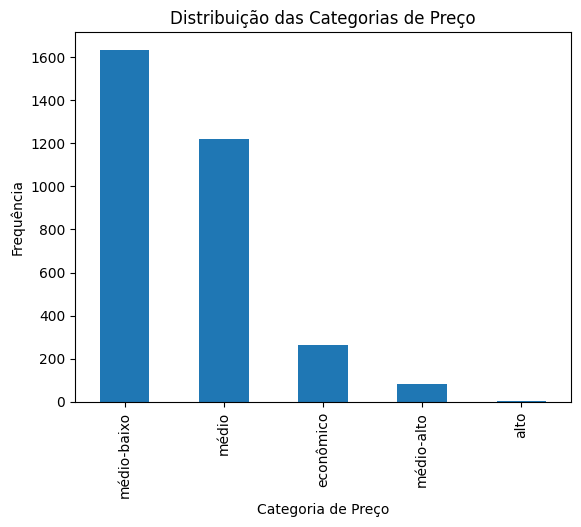

In [44]:
min_value = p['price'].min() #2000
max_value = p['price'].max() # 2954083
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
assert p['price'].min() > 0, "Todos os preços devem ser maiores que zero para aplicar log."
# Criar bins logarítmicos
bins = np.logspace(np.log10(min_value), np.log10(max_value), 6)
# Definir rótulos para as categorias
labels = ['econômico', 'médio-baixo', 'médio', 'médio-alto', 'alto']
# Categorizar os dados
p['category_price'] = pd.cut(p['price'], bins=bins, labels=labels, include_lowest=True)
# Verificar a distribuição das categorias
print(p['category_price'].value_counts())

# Plotar a distribuição das categorias
p['category_price'].value_counts().plot(kind='bar')
plt.xlabel('Categoria de Preço')
plt.ylabel('Frequência')
plt.title('Distribuição das Categorias de Preço')
plt.show()


### Nova categoria k(means) -> Category

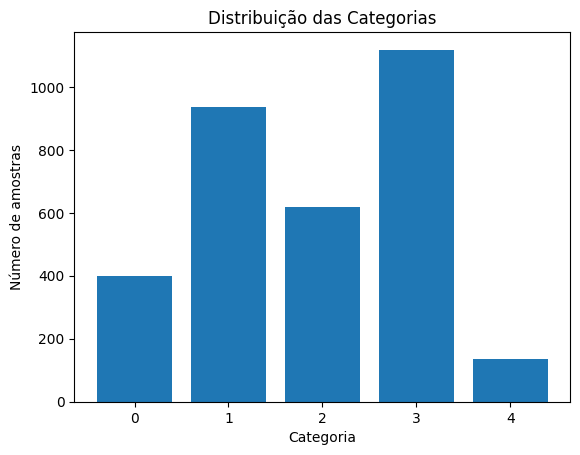

In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = p[['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]

# Padronizar os dados para garantir que cada atributo contribua de forma igual
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir o número de clusters
n_clusters = 5

# Aplicar o algoritmo K-means para agrupar os carros em clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Adicionar uma nova coluna 'Categoria' ao DataFrame com base nos clusters
p['Categoria'] = kmeans.labels_
import matplotlib.pyplot as plt

# Contagem de amostras em cada categoria
categoria_counts = p['Categoria'].value_counts().sort_index()

# Criar o gráfico de barras
plt.bar(categoria_counts.index, categoria_counts.values)

# Adicionar rótulos e título
plt.xlabel('Categoria')
plt.ylabel('Número de amostras')
plt.title('Distribuição das Categorias')

# Mostrar o gráfico
plt.show()



In [ ]:
p.info()

In [46]:
p['Categoria'] = p['Categoria'].astype('category')

# subset 1

- Substituição de valores nulos e '-' PELA MODA
- Remoção outliers LOF
- Variavies cat -> numerica

In [47]:
data1 = p

In [ ]:
data1.describe()

In [ ]:
data1.head()

### NULL's substitution

#### fuel_type + engine + ext_col + int_col + accident + transmission (subsituir na's pela moda)

In [48]:
data1['fuel_type'].unique()
data1['fuel_type'].isnull().sum()
data1['fuel_type'].fillna('Eletric', inplace=True)
mod = data1['fuel_type'].mode()[0]

data1['fuel_type'] = data1['fuel_type'].replace('–', mod)
data1['fuel_type'].unique()

mod1=data1['accident'].mode()[0]
data1['accident'].fillna(mod1, inplace=True)

mod3=data1['engine'].mode()[0]
data1['engine'] = data1['engine'].replace('–', mod3)

mod5=data1['ext_col'].mode()[0]
data1['ext_col'] = data1['ext_col'].replace('–', mod5)

mod6=data1['int_col'].mode()[0]
data1['int_col'] = data1['int_col'].replace('–', mod6)

mod7=data1['transmission'].mode()[0]
data1['transmission'] = data1['transmission'].replace('–', mod6)


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17596\3368779346.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['fuel_type'].fillna('Eletric', inplace=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17596\3368779346.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

### Identificação dos Outliers - LOF

In [49]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

nums = data1.select_dtypes(include=[np.number])

In [50]:
lof = LocalOutlierFactor(n_neighbors=20, novelty=False, contamination=0.05)
y_pred = lof.fit_predict(nums)
data1['outlier'] = y_pred

In [51]:
out = data1[data1['outlier']==-1]
# len(out) # 161 outliers
out.describe()

outlier_indices = data1[data1['outlier'] == -1].index
o=(data1.loc[outlier_indices]).head()
# o.describe() # dados outliers

### Boxplot outliers

In [ ]:
woo = data1.drop(['outlier'], axis=1) # nova variável para fazer o modelo sem os outliers
import numpy as np
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas
colunas_numericas = woo.select_dtypes(include=np.number)

num_linhas = 2
num_colunas = 4
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(16, 10))

for i, coluna in enumerate(colunas_numericas.columns):
    linha = i // num_colunas
    coluna_atual = i % num_colunas
    axs[linha, coluna_atual].boxplot(colunas_numericas[coluna])
    axs[linha, coluna_atual].set_title(f'{coluna}')
    axs[linha, coluna_atual].set_xlabel('Coluna')
    axs[linha, coluna_atual].set_ylabel('Valores')
    axs[linha, coluna_atual].grid(True)

plt.tight_layout()
plt.show()

### Outlier por IQR

In [ ]:

for column in data1.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data1[column].quantile(0.25)
    Q3 = data1[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data1[column] > Q1 - 1.5*IQR) & (data1[column] < Q3 + 1.5*IQR))
    
    num_outliers = len(data1[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")


#### REMOÇÃO DOS OUTLIERS

In [52]:
criteria = data1['outlier'] == -1
clean_data = data1[~criteria] # datarfame sem outliers
clean_data.columns
ck = clean_data.drop(['outlier'], axis=1) # nova variável para fazer o modelo sem os outliers
#ck.head()

In [ ]:
#(p.drop(outlier_indices)).describe() # dados sem os outliers

### Correlações

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr, chi2_contingency

# va numericas
numeric_df = ck.select_dtypes(include=['int64', 'float64'])
spearman_corr = numeric_df.corr(method='spearman')
spearman_corr

In [ ]:
#va categorica
categorical_columns = ck.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(ck[column], ck['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

### Transformar categoricas -> numéricas

In [54]:
#!pip install category_encoders # versao abaixo da 3.12

import  category_encoders as ce
from category_encoders.one_hot import OneHotEncoder
cat_columns = ck.select_dtypes(include=['object','category']).columns.tolist()
one_hot_encoder = ce.OneHotEncoder(cols=cat_columns)
ck=one_hot_encoder.fit_transform(ck)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.p

### NORMALIZAÇÃO xxxx fica quando for fazer o modelo

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform the features
ck[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2','milage']] = scaler.fit_transform(ck[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'milage']])

### LOG xxxxx fica quando for fazer o modelo

In [ ]:
import numpy as np

# Apply logarithmic transformation to skewed features
skewed_features = ['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'milage']  # Specify the skewed features here
ck[skewed_features] = np.log1p(data1[skewed_features])
ck.head(1)

In [55]:
ck.to_csv('subset_1.csv', index=False) # sem normalizar

# subset 2

-  substituir '-' por desconhecido
- Remoção outliers LOF
- Variavies cat -> numerica

In [62]:
data2=p

In [63]:
p.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros',
       'Numero_Valvulas', 'T2', 'category_price', 'Categoria', 'outlier'],
      dtype='object')

### NULL's substitution

### Fuel Type

In [64]:
data2['fuel_type'].unique()
data2['fuel_type'].isnull().sum()
data2['fuel_type'].fillna('Eletric', inplace=True)
data2['fuel_type'] = data2['fuel_type'].replace('–', 'desconhecido')

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17596\2341822197.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['fuel_type'].fillna('Eletric', inplace=True)


#### accident + engine + transmission + ex_col + int_col

In [65]:
data2['accident'].fillna('desconhecido', inplace=True)
data2['engine'] = data2['engine'].replace('–', 'desconhecido')
data2['transmission'] = data2['transmission'].replace('–', 'desconhecido')
data2['ext_col'] = data2['ext_col'].replace('–', 'desconhecido')
data2['int_col'] = data2['int_col'].replace('–', 'desconhecido')


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17596\3677287092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['accident'].fillna('desconhecido', inplace=True)


### Remoção de Ouliers - LOF

In [66]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

nums = data2.select_dtypes(include=[np.number])
lof = LocalOutlierFactor(n_neighbors=20, novelty=False, contamination=0.05)
y_pred = lof.fit_predict(nums)
data2['outlier'] = y_pred
out = data2[data2['outlier']==-1]
len(out) # 161 outliers
out.describe()

outlier_indices = data2[data2['outlier'] == -1].index
o=(data2.loc[outlier_indices]).head()
o.describe() # dados outliers
criteria = data2['outlier'] == -1
clean_data = data2[~criteria] # dataframe sem outliers
clean_data.columns
ck2 = clean_data.drop(['outlier'], axis=1) # nova variável para fazer o modelo sem os outliers
#ck2.head()


In [67]:
ck2.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros',
       'Numero_Valvulas', 'T2', 'category_price', 'Categoria'],
      dtype='object')

### Correlações

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr, chi2_contingency

# va numericas
numeric_df = ck2.select_dtypes(include=['int64', 'float64'])
spearman_corr = numeric_df.corr(method='spearman')
spearman_corr

In [ ]:
#va categorica
categorical_columns = ck2.select_dtypes(include=['object']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(ck2[column], ck2['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

### Transformação de variáveis categoricas em numéricas

In [68]:
#!pip install category_encoders # versao abaixo da 3.12

import  category_encoders as ce
from category_encoders.one_hot import OneHotEncoder
cat_columns = ck2.select_dtypes(include=['object','category']).columns.tolist()
one_hot_encoder = ce.OneHotEncoder(cols=cat_columns)
ck2=one_hot_encoder.fit_transform(ck2)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.p

### Normalização xxxxx fica quando for fazer o modelo

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform the features
ck2[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'milage']] = scaler.fit_transform(ck2[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas' ,'milage']])


### Padronização xxxx fica quando for fazer o modelo

In [ ]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler(with_mean=False)
columns_to_scale = ['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'milage']
std_scaler.fit(ck2[columns_to_scale])
ck2[columns_to_scale] = std_scaler.transform(ck2[columns_to_scale])


In [70]:
ck2.to_csv('subset_2.csv', index=False)

# Cenário 1 -> todas as variáveis

# Cenário 2

In [ ]:
ck1=ck.loc[:, ['model_year', 'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]

# Regressão Linear 1

(características do carro (só com variáveis numéricas)) do subset 1


### Separar Data / Treinar e Avaliar Algoritmos

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
# from sklearn import datasets
# from slickml.metrics import (
#     RegressionMetrics,
# )  # downloaded from https://github.com/slickml/slick-ml # btw pip install slickml
from matplotlib import pyplot as plt
# import shap

In [ ]:


X = ck1.drop(['price'], axis=1) 
y = ck1['price'] 

In [ ]:
X = pd.get_dummies(X, drop_first=True) # para var. categóricas
# Option 1: Fill missing values, for example with the median or mean
# X.fillna(X.median(), inplace=True)

# Option 2: Drop rows with missing values
# X.dropna(inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Car Prices (Multiple Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


#### RANDOM FOREST

In [ ]:
# train and predict with Random Forest Regressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
pred = RF.predict(X_test)

In [ ]:
# Regression metrics for Random Forest
from slickml.metrics import RegressionMetrics

reg_metrics = RegressionMetrics(y_test, pred)
reg_metrics.plot()

# CORRELATION

In [ ]:
import seaborn as sns

dados_numericos = data.select_dtypes(include=['number'])
correlation_matrix = dados_numericos.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# preço está bastante correlacionado com potência e ano de fábrico

correlação p/ preço/nº valvulas diminui muito quando se substitui NaN (0.51 para 0.11)

# Regressão Linear 2

In [ ]:
# selecionar as colunas necessárias a partir do df SEM OUTLIERS
ck3=ck.loc[:, ['model_year', 'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'fuel_type', 'accident', 'clean_title']]
X = ck3.drop(['price'], axis=1) 
y = ck3['price'] 

In [ ]:
X = pd.get_dummies(X, drop_first=True) # para var. categóricas 
# Option 1: Fill missing values, for example with the median or mean
X.fillna(X.median(), inplace=True)

# Option 2: Drop rows with missing values
# X.dropna(inplace=True)´

# nao precisa mais desse codigo em cima dessa linha

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Car Prices (Multiple Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

erro um pouco menor do que R1

#### CORES

In [ ]:
def simplify_color(color):
    return color.split()[0]

# Aplicar a função à coluna 'Cor'
p['simp_int_col'] = p['int_col'].apply(simplify_color)
p['simp_ext_col'] = p['ext_col'].apply(simplify_color) # de 265 p/ 191
# n vale a pena

# AD -> Subset 2  -cenário 1

In [71]:
subset2 = pd.read_csv('subset_2.csv', index_col=False)

### Normalização

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
subset2[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2','milage']] = scaler.fit_transform(subset2[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'milage']])

### Dividir o dataset em treino e teste

In [73]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
from sklearn import datasets
# from slickml.metrics import (
#     RegressionMetrics,
# )   # downloaded from https://github.com/slickml/slick-ml
from matplotlib import pyplot as plt
#import shap

In [74]:
X = subset2.drop(['price'], axis=1)  # sem os outliers 
y = subset2['price'] 

In [75]:
# Divida os dados transformados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
DT = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
DT.fit(X_tr, y_tr)
pred3 = DT.predict(X_ts)
# from sklearn.tree import DecisionTreeRegressor
# dt1_model = DecisionTreeRegressor(random_state=0,
#                                            criterion='mse')
# dt1_model.fit(X_tr,y_tr)

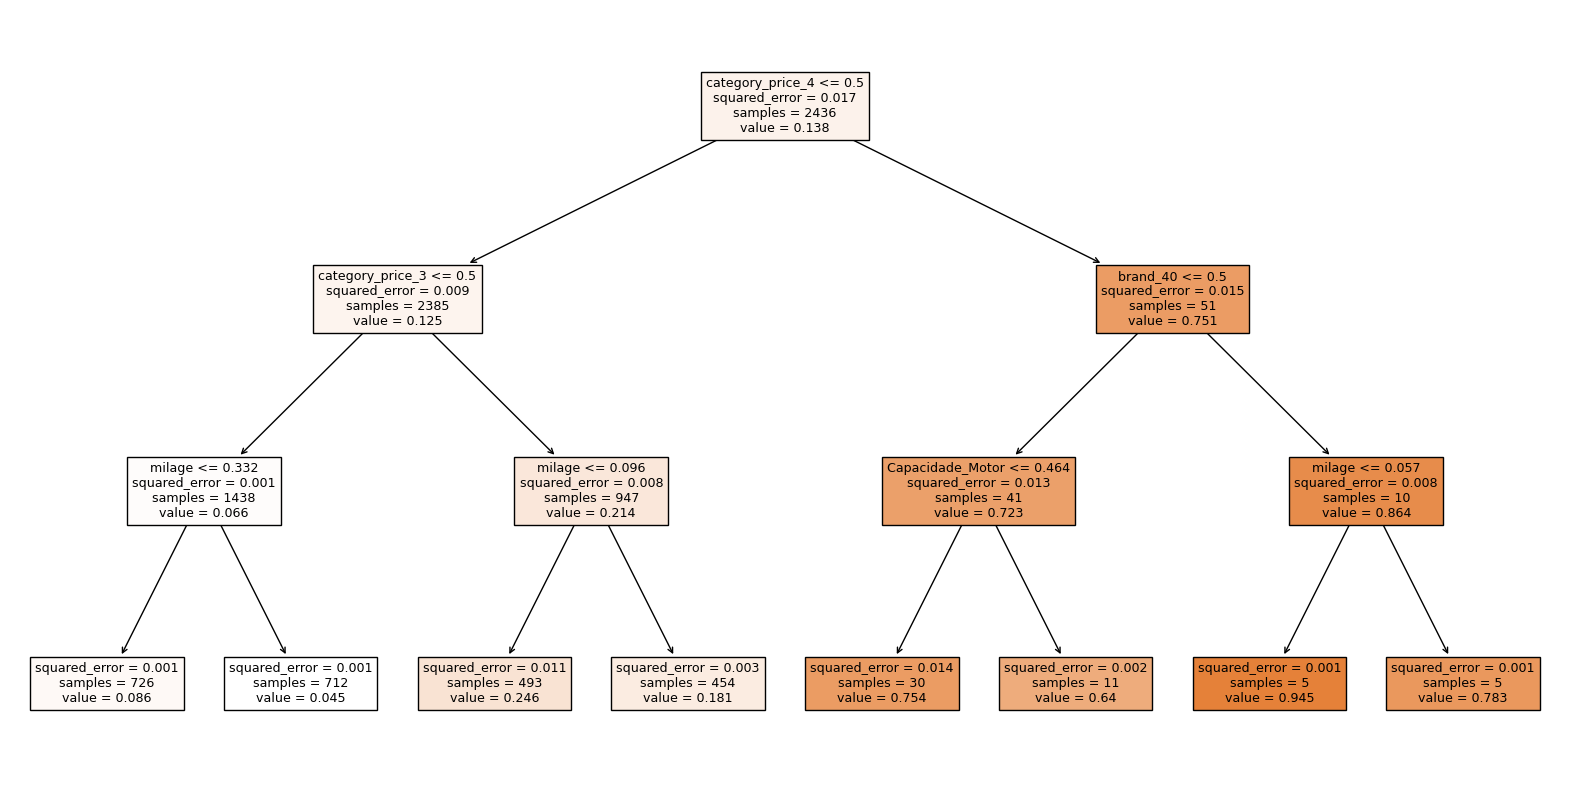

In [77]:
plt.figure(figsize=(20,10))
tree.plot_tree(DT, filled=True, feature_names=X_tr.columns)
plt.show()

In [ ]:
# Regression metrics for Decision Tree
reg_metrics3 = RegressionMetrics(y_ts, pred3)
reg_metrics3.plot()

In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Calcular as predições
preds = DT.predict(X_ts)

# Calcular métricas de regressão
mse = mean_squared_error(y_ts, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_ts, preds)
mae = mean_absolute_error(y_ts, preds)
medae = median_absolute_error(y_ts, preds)

# Exibir as métricas
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("Coeficiente de Determinação (R²):", r2)
print("Erro Absoluto Médio (MAE):", mae)
print("Mediana do Erro Absoluto (MedAE):", medae)

Erro Quadrático Médio (MSE): 0.00343389722246858
Raiz do Erro Quadrático Médio (RMSE): 0.058599464353085856
Coeficiente de Determinação (R²): 0.7794488593308361
Erro Absoluto Médio (MAE): 0.03908593675834906
Mediana do Erro Absoluto (MedAE): 0.02765571826499478


In [79]:
#!pip install graphviz

from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(DT, out_file=None)
graphviz.Source(tree_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## AD -> Subset 1- Cenário1

In [56]:
subset1 = pd.read_csv('subset_1.csv', index_col=False)

### Normalização

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
subset1[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2','milage']] = scaler.fit_transform(subset1[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'milage']])

In [58]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
X = subset1.drop(['price'], axis=1)  # sem os outliers 
y =subset1['price'] 


In [59]:
# Divida os dados transformados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, random_state=42)

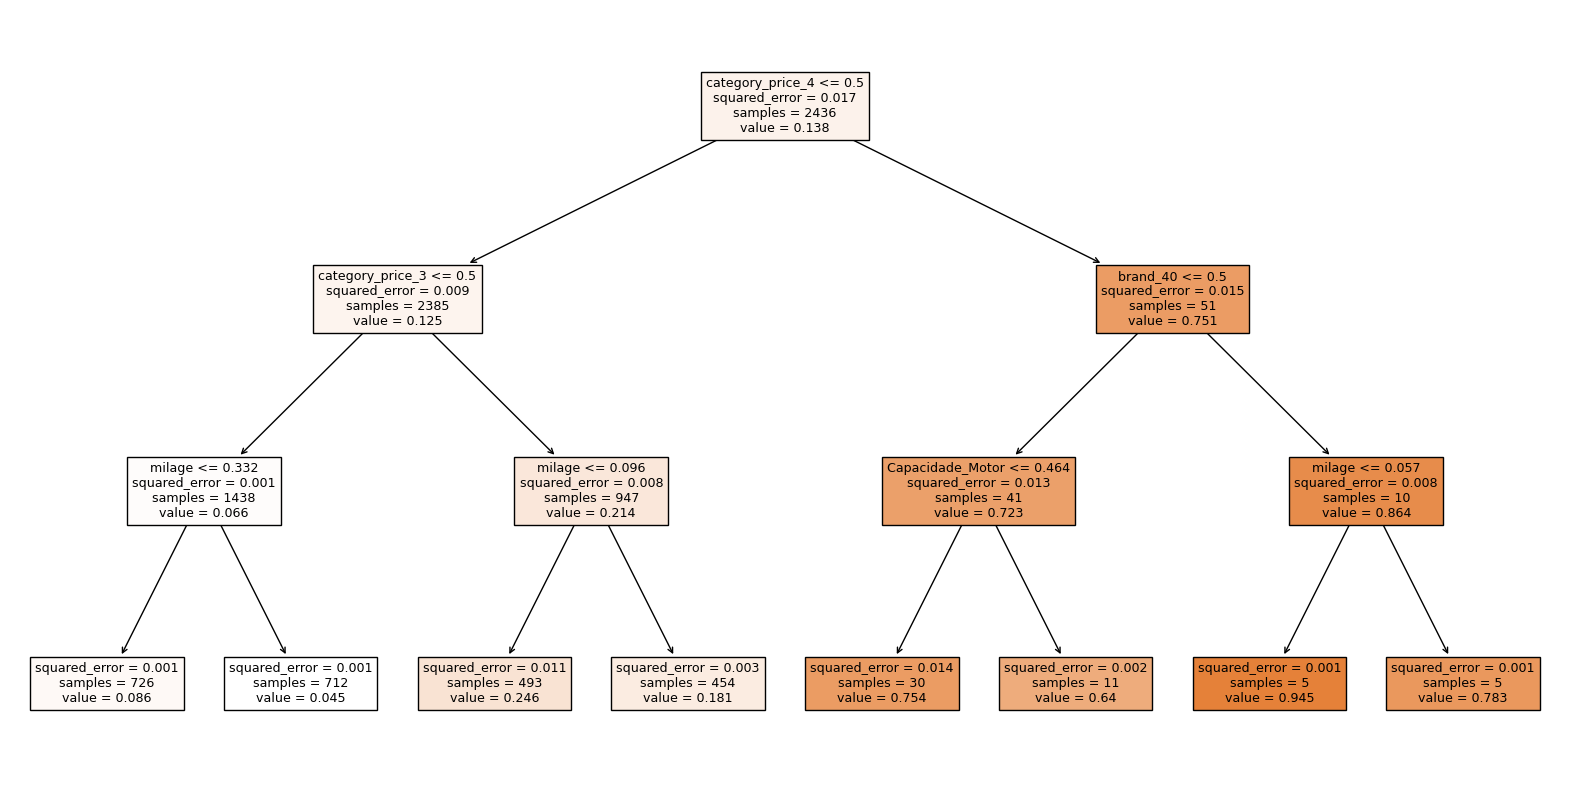

In [60]:
DT = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
DT.fit(X_tr, y_tr)
pred3 = DT.predict(X_ts)
plt.figure(figsize=(20,10))
tree.plot_tree(DT, filled=True, feature_names=X_tr.columns)
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Calcular as predições
preds = DT.predict(X_ts)

# Calcular métricas de regressão
mse = mean_squared_error(y_ts, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_ts, preds)
mae = mean_absolute_error(y_ts, preds)
medae = median_absolute_error(y_ts, preds)

# Exibir as métricas
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("Coeficiente de Determinação (R²):", r2)
print("Erro Absoluto Médio (MAE):", mae)
print("Mediana do Erro Absoluto (MedAE):", medae)


Erro Quadrático Médio (MSE): 0.00343389722246858
Raiz do Erro Quadrático Médio (RMSE): 0.058599464353085856
Coeficiente de Determinação (R²): 0.7794488593308361
Erro Absoluto Médio (MAE): 0.03908593675834906
Mediana do Erro Absoluto (MedAE): 0.02765571826499478
